<a href="https://colab.research.google.com/github/AHAAkash/Digital-Image-Processing/blob/main/ReadDisplay_Flipping0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive in your VM

The example below shows how to mount your Google Drive in your virtual machine using an authorization code, and shows a couple of ways to write & read files there. Once executed, observe the new file (`foo.txt`) is visible in https://drive.google.com/

Note this only supports reading and writing files.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

# New Section

In [4]:
from google.colab import files
from IPython.display import Image

In [5]:
uploaded = files.upload()

Saving Introduction to Computer Vision.jpg to Introduction to Computer Vision.jpg


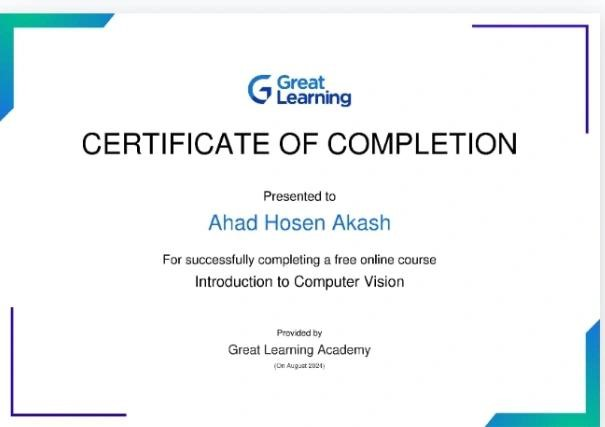

In [9]:

#Upload an image
Image(filename='Introduction to Computer Vision.jpg', width=500)

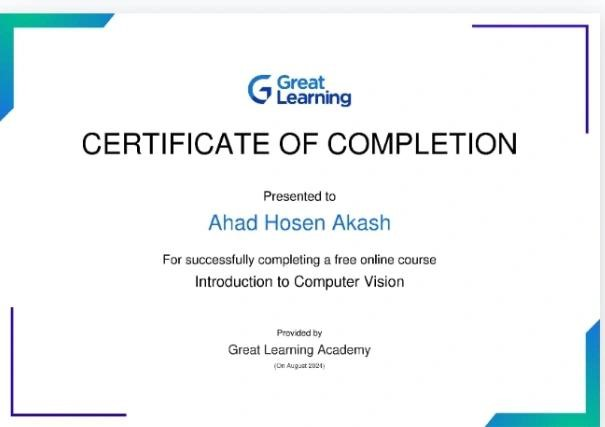

In [18]:
# Import necessary libraries
import numpy as np  # For numerical operations (optional in this case)
import cv2  # OpenCV library for computer vision tasks
import matplotlib.pyplot as plt  # For plotting (optional in this case)
from google.colab.patches import cv2_imshow  # Function to display images in Colab

# Read the image file
# cv2.imread() reads the image from the specified path and stores it as a NumPy array in the 'img' variable.
img = cv2.imread('/content/Introduction to Computer Vision.jpg')

# Display the image using cv2_imshow()
# cv2_imshow() is a Colab-specific function that displays the image within the notebook output.
cv2_imshow(img)

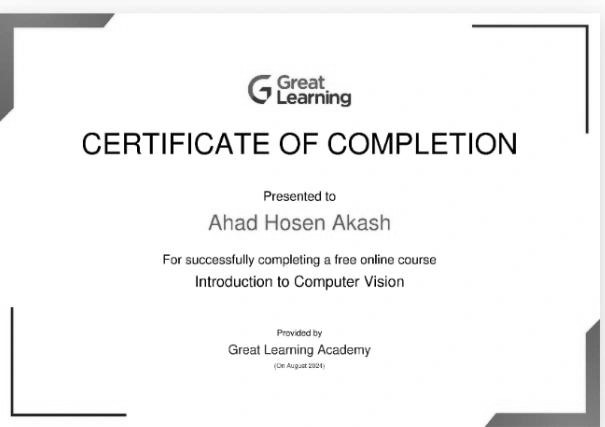

In [19]:
# Image in gray scale mood
import numpy as np  # For numerical operations (optional in this case)
import cv2  # OpenCV library for computer vision tasks
import matplotlib.pyplot as plt  # For plotting (optional in this case)
from google.colab.patches import cv2_imshow  # Function to display images in Colab

# Read the image file
# cv2.imread() reads the image from the specified path and stores it as a NumPy array in the 'img' variable.
img = cv2.imread('/content/Introduction to Computer Vision.jpg',0)  # Add 0 (zero) to Convert the image in gray

# Display the image using cv2_imshow()
# cv2_imshow() is a Colab-specific function that displays the image within the notebook output.
cv2_imshow(img)

In [20]:
#Saving the particular image--> cv2.imwrite('In which name we want to save.extension', image which you want to save)
cv2.imwrite('Gray_img.png',img)

True

size(old): (605, 427)
size(New): (150, 105)


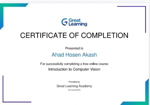

In [34]:
# Change the size of the image
import os
from PIL import Image
import glob
img_path='/content/Introduction to Computer Vision.jpg'
img= Image.open(img_path)
#Calculate the new height and width
width,height = img.size
new_width=150
new_height=int(height*new_width/width)
#Create a new resize image
rimage= img.resize((new_width,new_height))
print('size(old):',format(img.size))
print('size(New):',format(rimage.size))
display(rimage)


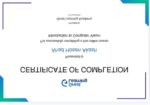

In [35]:
# Change the size of the image and flip it vertically
import os
from PIL import Image
import glob

img_path = '/content/Introduction to Computer Vision.jpg'
img = Image.open(img_path)

# Calculate the new height and width
width, height = img.size
new_width = 150
new_height = int(height * new_width / width)

# Resize the image
rimage = img.resize((new_width, new_height), Image.Resampling.BILINEAR)

# Flip the image vertically using Image.Transpose.FLIP_TOP_BOTTOM
flipped_image = rimage.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

display(flipped_image)

# Saving data to Google Drive

* [PyDrive reference](https://pythonhosted.org/PyDrive/)
* [Google Drive API reference](https://developers.google.com/drive/v3/reference/)

In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

KeyboardInterrupt: 

After executing the cell above, a new file named 'Sample file.txt' will appear in your [drive.google.com](https://drive.google.com/) file list.

# Listing files in Google Drive

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

# Downloading files or importing data from Google Drive

* [PyDrive reference](https://pythonhosted.org/PyDrive/)
* [Google Drive API reference](https://developers.google.com/drive/v3/reference/)

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

# Downloading files to your local file system

`files.download` will invoke a browser download of the file to your local computer.


In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')